In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from boruta import BorutaPy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
import time
from sklearn.preprocessing import MinMaxScaler

/apps/python-2.7.14/lib/python2.7/site-packages/scikit_learn-0.19.2-py2.7-linux-x86_64.egg/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
data = pd.read_csv('specPhotoDR10v2_GauthamG_0.csv')

In [5]:
data.dropna(inplace = True)

In [6]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data.head()

,specObjID,objid,ra,dec,photoz,photoz_err,specz,specz_err,dered_u,dered_g,...,expPhi_g,expAB_r,expRad_r,expPhi_r,expAB_i,expRad_i,expPhi_i,expAB_z,expRad_z,expPhi_z
0,0.081865,0.002829,0.154768,0.128969,0.297002,0.999681,0.043863,0.001021,0.533379,0.480263,...,0.464509,0.824348,0.013380,0.479943,0.796099,0.013494,0.480844,0.606807,0.010235,0.506055
1,0.081868,0.002829,0.156205,0.129019,0.584260,0.999817,0.064740,0.001021,0.479019,0.490616,...,0.540118,0.594466,0.013163,0.515143,0.610589,0.013029,0.511761,0.279182,0.012368,0.545185
2,0.081493,0.002877,0.141090,0.136944,0.152211,0.999683,0.022515,0.001021,0.428546,0.415922,...,0.475371,0.913257,0.035797,0.476118,0.890801,0.034961,0.484317,0.949539,0.025079,0.470135
3,0.081494,0.002877,0.141090,0.136944,0.152211,0.999683,0.022520,0.001021,0.428546,0.415922,...,0.475371,0.913257,0.035797,0.476118,0.890801,0.034961,0.484317,0.949539,0.025079,0.470135
6,0.081493,0.002877,0.141406,0.138006,0.606950,0.999776,0.001497,0.001021,0.600054,0.507319,...,0.578584,0.172073,0.025074,0.583177,0.338253,0.005512,0.543976,0.197601,0.006683,0.507553


In [7]:
data.dropna(inplace = True)

In [8]:
data = data.drop(['specObjID', 'objid'], axis = 1)

In [9]:
XErr = []
sub1 = 'err'
for a in list(data.columns):
  if sub1 in a:
    XErr.append(a)
sub2 = 'Err'
for a in list(data.columns):
  if sub2 in a:
    XErr.append(a)

In [10]:
data = data.drop(XErr, axis = 1)

In [11]:
for dcol in data.columns:
    print(dcol)

ra
dec
photoz
specz
dered_u
dered_g
dered_r
dered_i
dered_z
specType
photpType
petroRad_u
petroRad_g
petroRad_r
petroRad_i
petroRad_z
deVRad_u
deVRad_g
deVRad_r
deVRad_i
deVRad_z
extinction_u
extinction_g
extinction_r
extinction_i
extinction_z
psfMag_u
psfMag_g
psfMag_r
psfMag_i
psfMag_z
fiberMag_u
fiberMag_g
fiberMag_r
fiberMag_i
fiberMag_z
expAB_u
expRad_u
expPhi_u
expAB_g
expRad_g
expPhi_g
expAB_r
expRad_r
expPhi_r
expAB_i
expRad_i
expPhi_i
expAB_z
expRad_z
expPhi_z


In [12]:
data_origi = data

In [13]:
data = data.drop(['specType', 'photpType', 'specz'], axis = 1)

In [14]:
RFR = RandomForestRegressor()
X = data.drop(['photoz'], axis = 1)
y = data['photoz']
names = list(X.columns)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
import time

In [17]:
start = time.time()
for i in range(50):
     i = 1
stop = time.time()
time_ = stop - start
print(time_)
# Testing time library

8.6784362793e-05


In [18]:
DTR_0 = DecisionTreeRegressor()

In [20]:
start = time.time()
DTR_0.fit(X_train, y_train)
stop = time.time()
print(stop - start)

61.3255860806


In [21]:
DTR_0.score(X_test, y_test)
# R^2 metric

0.9553899792912176

In [22]:
pred_DTR_0 = DTR_0.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
print(metrics.mean_squared_error(y_test, pred_DTR_0))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_DTR_0)))
# MSE and RMSE

0.001820296623890121
0.04266493435937903


In [25]:
RFR_0 = RandomForestRegressor()

In [26]:
start = time.time()
RFR_0.fit(X_train, y_train)
stop = time.time()
print(stop - start)

377.425678968


In [27]:
RFR_0.score(X_test, y_test)
# R^2 metric

0.9773796817849687

In [28]:
pred_RFR_0 = RFR_0.predict(X_test)

In [29]:
print(metrics.mean_squared_error(y_test, pred_RFR_0))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_RFR_0)))
# MSE and RMSE

0.0009230143412606723
0.030381151085182277


In [30]:
# From previous estimation of top 20 features and photoz
data1_columns = ['dered_g','fiberMag_r','dered_u','fiberMag_i','psfMag_z','psfMag_g','fiberMag_g','fiberMag_z','fiberMag_u','dered_i','dered_z','dered_r','deVRad_g','expAB_r','psfMag_r','psfMag_u','psfMag_i','expRad_u','deVRad_z','expAB_z','photoz']

In [31]:
print(np.array(data1_columns).shape)

(21,)


In [32]:
from sklearn.ensemble import AdaBoostRegressor

In [33]:
ADR_0 = AdaBoostRegressor(DTR_0)

In [34]:
start = time.time()
ADR_0.fit(X_train, y_train)
stop = time.time()
print(stop - start)

2695.89390707


In [35]:
ADR_0.score(X_test, y_test)
# R^2 metric

0.9823835995998619

In [36]:
pred_ADR_0 = ADR_0.predict(X_test)

In [37]:
print(metrics.mean_squared_error(y_test, pred_ADR_0))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_ADR_0)))
# MSE and RMSE

0.0007188311877908386
0.026811027354259265


In [38]:
data1 = data[data1_columns]
X1 = data1.drop(['photoz'], axis = 1)
y1 = data1['photoz']

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=101)

In [40]:
DTR_1 = DecisionTreeRegressor()

In [41]:
start = time.time()
DTR_1.fit(X1_train, y1_train)
stop = time.time()
print(stop - start)

25.7359960079


In [42]:
DTR_1.score(X1_test, y1_test)
# R^2 metric

0.9581255253637162

In [43]:
pred_DTR_1 = DTR_1.predict(X1_test)

In [44]:
print(metrics.mean_squared_error(y1_test, pred_DTR_1))
print((np.sqrt(metrics.mean_squared_error(y1_test, pred_DTR_1))))
# MSE and RMSE

0.0017086736028480182
0.04133610531784554


In [45]:
RFR_1 = RandomForestRegressor()

In [46]:
start = time.time()
RFR_1.fit(X1_train, y1_train)
stop = time.time()
print(stop - start)

157.815502882


In [47]:
RFR_1.score(X1_test, y1_test)
# R^2 metric

0.9787522895477205

In [48]:
pred_RFR_1 = RFR_1.predict(X1_test)

In [49]:
print(metrics.mean_squared_error(y1_test, pred_RFR_1))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_ADR_0)))
# MSE and RMSE

0.0008670055513797322
0.026811027354259265


In [50]:
ADR_1 = AdaBoostRegressor(DTR_1)

In [51]:
start = time.time()
ADR_1.fit(X1_train, y1_train)
stop = time.time()
print(stop - start)

1191.2598412


In [52]:
ADR_1.score(X1_test, y1_test)
# R^2 metric

0.9833328516782339

In [53]:
pred_ADR_1 = ADR_1.predict(X1_test)

In [54]:
print(metrics.mean_squared_error(y1_test, pred_ADR_1))
print(np.sqrt(metrics.mean_squared_error(y1_test, pred_ADR_1)))
# MSE and RMSE

0.0006800972816857243
0.026078674845277785


In [55]:
import seaborn as sns

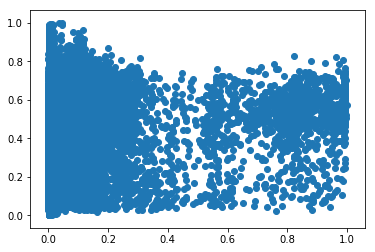

In [56]:
plt.scatter(data_origi['specz'], data_origi['photoz'])

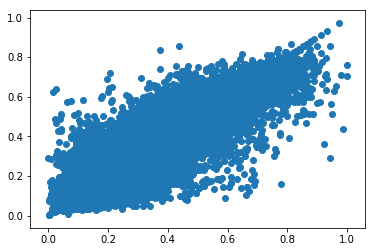

In [57]:
plt.scatter(y1_test, pred_ADR_1)

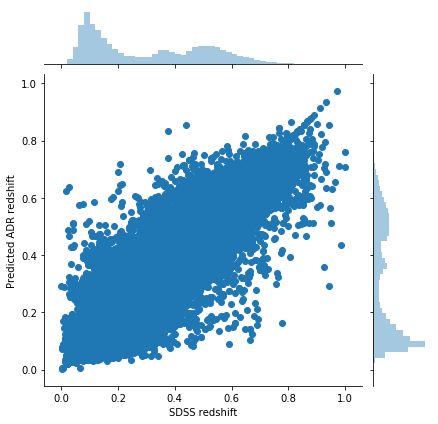

In [58]:
a = sns.jointplot(y1_test, pred_ADR_1)
# plt.ylabel('Predicted RFR redshift')
# plt.xlabel('SDSS redshift')
a.set_axis_labels('SDSS redshift', 'Predicted ADR redshift')

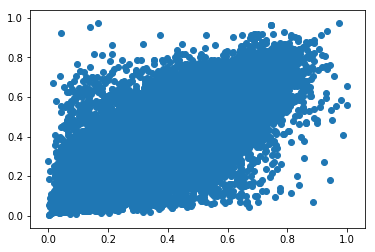

In [59]:
plt.scatter(y1_test, pred_DTR_1)

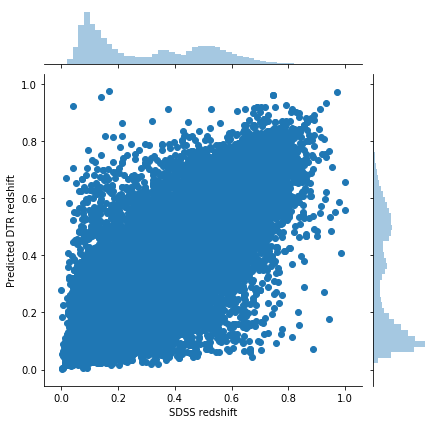

In [60]:
a = sns.jointplot(y1_test, pred_DTR_1)
# plt.ylabel('Predicted RFR redshift')
# plt.xlabel('SDSS redshift')
a.set_axis_labels('SDSS redshift', 'Predicted DTR redshift')

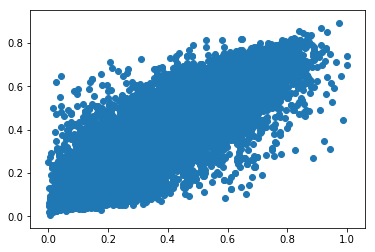

In [61]:
plt.scatter(y1_test, pred_RFR_1)

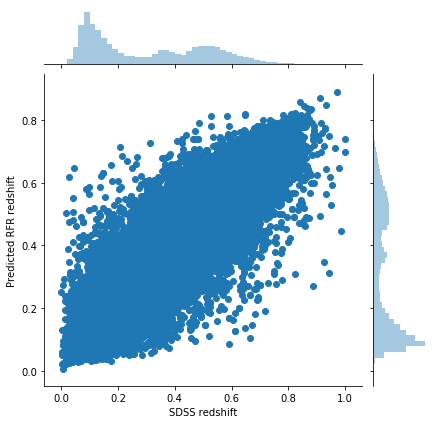

In [62]:
a = sns.jointplot(y1_test, pred_RFR_1)
# plt.ylabel('Predicted RFR redshift')
# plt.xlabel('SDSS redshift')
a.set_axis_labels('SDSS redshift', 'Predicted RFR redshift')

In [234]:
# Outlier analysis

In [93]:
# mod(Zpred - Zspec)/(1+Zspec) > 0.15
# We don't have pz-sz right now =>

In [95]:
# data_origi['specz']

In [63]:
datao = data_origi[data1_columns]

In [64]:
# data1_columns
Xo = datao.drop(['photoz'], axis = 1)

In [65]:
d = {'photoz' : data_origi['photoz'], 'specz' : data_origi['specz']}

In [66]:
yo = pd.DataFrame(data = d)

In [67]:
# yo

In [68]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.4, random_state=101)

In [69]:
yo_train['photoz'][1]

0.5842600342978057

In [70]:
DTRo = DecisionTreeRegressor()
DTRo.fit(Xo_train, yo_train['photoz'])
predDo = DTRo.predict(Xo_test)

In [71]:
np.array(yo_train['specz'])[0]

0.026597543490723144

In [85]:
print(y_train.head())

1311935    0.235412
985692     0.360481
967202     0.430940
843024     0.145561
40393      0.157225
Name: photoz, dtype: float64


In [86]:
# For outliers mod(Zpred - Zspec)/(1+Zspec) > 0.15
Bias0 = []
Precision0 = []
OutL = 0.0
N = len(predDo)
for a in range(N):
    if(np.abs(predDo[a] - np.array(yo_test['specz'])[a])/(1 + np.array(yo_test['specz'])[a]) >= 0.15):
        OutL += 1
    Bias0.append(np.abs(predDo[a] - np.array(yo_test['specz'])[a]))
    Precision0.append((predDo[a] - np.array(yo_test['specz'])[a])/(1 + np.array(yo_test['specz'])[a]))
OutLdtr = OutL*100/N
Biasdtr = np.mean(Bias0)
Precisiondtr = np.std(Precision0)

In [87]:
print(OutLdtr, Biasdtr, Precisiondtr)

(55.97988311469671, 0.25526016791434974, 0.16165593154704935)


In [76]:
RFRo = RandomForestRegressor()
RFRo.fit(Xo_train, yo_train['photoz'])
predRo = RFRo.predict(Xo_test)

In [88]:
# For outliers mod(Zpred - Zspec)/(1+Zspec) > 0.15
OutL = 0.0
N = len(predRo)
Bias1 = []
Precision1 = []
for a in range(N):
    if(np.abs(predRo[a] - np.array(yo_test['specz'])[a])/(1 + np.array(yo_test['specz'])[a]) >= 0.15):
        OutL += 1
    Bias1.append(np.abs(predRo[a] - np.array(yo_test['specz'])[a]))
    Precision1.append((predRo[a] - np.array(yo_test['specz'])[a])/(1 + np.array(yo_test['specz'])[a]))

OutLRateRF = OutL*100/N
Biasrfr = np.mean(Bias1)
Precisionrfr = np.std(Precision1)

In [89]:
print(OutLRateRF, Biasrfr, Precisionrfr)

(55.84813996306916, 0.2552314243068017, 0.158777072223615)


In [80]:
ADRo = AdaBoostRegressor(DTRo)
ADRo.fit(Xo_train, yo_train['photoz'])
predAo = ADRo.predict(Xo_test)

In [90]:
# For outliers mod(Zpred - Zspec)/(1+Zspec) > 0.15
OutL = 0.0
N = len(predRo)
Bias2 = []
Precision2 = []
for a in range(N):
    if(np.abs(predAo[a] - np.array(yo_test['specz'])[a])/(1 + np.array(yo_test['specz'])[a]) >= 0.15):
        OutL += 1
    Bias2.append(np.abs(predAo[a] - np.array(yo_test['specz'])[a]))
    Precision2.append((predAo[a] - np.array(yo_test['specz'])[a])/(1 + np.array(yo_test['specz'])[a]))

OutLRateADR = OutL*100/N
Biasadr = np.mean(Bias2)
Precisionadr = np.std(Precision2)

In [91]:
print(OutLRateADR, Biasadr, Precisionadr)

(55.63729747496747, 0.2550022708070775, 0.1597450110678089)
